<a href="https://colab.research.google.com/github/MaliheDahmardeh/World-Development-Indicators/blob/main/WDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **"World Development Indicators"** from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world that is from 1960 to 2015. This dataset contains over 1,500 indicators related to various social and economic issues across countries and regions of the world. Some of the indicators related to social policies and issues include:

- Poverty headcount ratio
- Access to improved water sources
- Access to improved sanitation facilities
- Infant mortality rate
- Maternal mortality rate
- Primary completion rate
- Secondary completion rate
- Tertiary completion rate
- Unemployment rate
- Income share held by lowest 20%

There are also indicators related to crime rates and technology issues, such as:

- Homicide rate
- Intentional homicides per 100,000 people
- Mobile cellular subscriptions per 100 people
- Internet users per 100 people

Using this dataset, one could conduct various correlation analyses between population rates and these social and economic indicators.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [ ]:
!pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import DataSet

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
!mkdir "/content/drive/My Drive/data"
os.listdir('/content/drive/MyDrive/data')

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/data’: File exists


['Country.csv', 'Indicators.csv']

In [ ]:
path = '/content/drive/MyDrive/data/Indicators.csv'
df = pd.read_csv(path)

In [ ]:
df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


#Data cleaning

In [ ]:
# Check for missing values in the dataset
print('Missing values:\n', df.isnull().sum())

Missing values:
 CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64


In [ ]:
# Check for Duplicated values in the dataset
print('Duplicated values:\n', df.duplicated().sum())

Duplicated values:
 0


#Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [ ]:
# Check the columns of the dataset
print('Columns:',df.columns)

# Check the shape of the dataset
print('Shape:', df.shape)

# Check the first few rows of the dataset
print('Head:\n', df.head())

# Check the data types of the columns
print('Data types:\n', df.dtypes)

# Check basic statistics of the numerical columns
print('Summary statistics:\n', df.describe())

Columns: Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')
Shape: (5656458, 6)
Head:
   CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  
Data types:
 CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year        

In [ ]:
# How many unique country codes and indicator names are there ?
countries = df['CountryCode'].unique().tolist()
indicators = df['IndicatorName'].unique().tolist()
print('How many unique country codes and indicator names are there?')
print('Contries size: %d' % len(countries))
print('Indicators size: %d' % len(indicators))

How many unique country codes and indicator names are there?
Contries size: 247
Indicators size: 1344


In [ ]:
# How many unique Years are there ?
Year = df['Year'].unique().tolist()
print('Year size: %d' % len(Year))
print('Years list:',Year)

Year size: 56
Years list: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [ ]:
#presentation of selected indicators
indicator_list = ['SP.DYN.CBRT.IN',  #Birth rate, crude (per 1,000 people) (0)
              'SP.DYN.CDRT.IN',  #Death rate, crude (per 1,000 people) (1)
              'SP.POP.GROW', #Population growth (annual %) (2)
              'SP.POP.65UP.TO.ZS',  #Population ages 65 and above (% of total) (3)
              'SP.POP.0014.TO.ZS',  #Population, ages 0-14 (% of total) (4)
              'SP.POP.1564.TO.ZS',  #Population, ages 15-64 (% of total) (5)
              'SP.DYN.LE00.FE.IN',  #Life expectancy at birth, female (years) (6)
              'SP.DYN.LE00.MA.IN',  #Life expectancy at birth, male (years) (7)
              'SP.DYN.LE00.IN',  #Life expectancy at birth, total (years) (8)
              'EN.ATM.CO2E.KT',  #CO2 emissions (kt) (9)
              'EG.USE.PCAP.KG.OE',  #Energy use (kg of oil equivalent per capita) (10)
              'EG.USE.ELEC.KH.PC',  #Electric power consumption (kWh per capita) (11)
              'NE.EXP.GNFS.ZS', #Exports of goods and services (% of GDP) (12)
              'NE.IMP.GNFS.ZS', #Imports of goods and services (% of GDP) (13)
              'NE.TRD.GNFS.ZS', #Trade (% of GDP) (14)
              'FP.CPI.TOTL', #Consumer price index (2010 = 100) (15)
              'NY.GDP.PCAP.CD', #GDP per capita (current US$) (16)
              'NY.GDP.PCAP.KD.ZG'] #GDP per capita growth (annual %) (17)

Let's do comparison between countries, I have selected China, Italy and USA

In [ ]:
#I need only Italy, United States and China
china = df.loc[df['CountryName'] == 'China']
USA = df.loc[df['CountryName'] == 'United States']
Italy = df.loc[df['CountryName'] == 'Italy']

In [ ]:
#No empty values
china.isna().sum(), USA.isna().sum(), Italy.isna().sum()

(CountryName      0
 CountryCode      0
 IndicatorName    0
 IndicatorCode    0
 Year             0
 Value            0
 dtype: int64,
 CountryName      0
 CountryCode      0
 IndicatorName    0
 IndicatorCode    0
 Year             0
 Value            0
 dtype: int64,
 CountryName      0
 CountryCode      0
 IndicatorName    0
 IndicatorCode    0
 Year             0
 Value            0
 dtype: int64)

In [ ]:
#plot function for charts
def plot_indicator(indicator, indicator2, indicator3):
    china_loc = china[['IndicatorName','Year','Value']][china['IndicatorCode']==indicator]
    x_china = china_loc['Year']
    y_china = china_loc['Value']
    title = china_loc['IndicatorName'].iloc[0]
    Italy_loc = Italy[['IndicatorName','Year','Value']][Italy['IndicatorCode']==indicator]
    x_Italy = Italy_loc['Year']
    y_Italy = Italy_loc['Value']
    USA_loc = USA[['IndicatorName','Year','Value']][USA['IndicatorCode']==indicator]
    x_USA = USA_loc['Year']
    y_USA = USA_loc['Value']

    china_loc2 = china[['IndicatorName','Year','Value']][china['IndicatorCode']==indicator2]
    x_china2 = china_loc2['Year']
    y_china2 = china_loc2['Value']
    title2 = china_loc2['IndicatorName'].iloc[0]
    Italy_loc2 = Italy[['IndicatorName','Year','Value']][Italy['IndicatorCode']==indicator2]
    x_Italy2 = Italy_loc2['Year']
    y_Italy2 = Italy_loc2['Value']
    USA_loc2 = USA[['IndicatorName','Year','Value']][USA['IndicatorCode']==indicator2]
    x_USA2 = USA_loc2['Year']
    y_USA2 = USA_loc2['Value']

    china_loc3 = china[['IndicatorName','Year','Value']][china['IndicatorCode']==indicator3]
    x_china3 = china_loc3['Year']
    y_china3 = china_loc3['Value']
    title3 = china_loc3['IndicatorName'].iloc[0]
    Italy_loc3 = Italy[['IndicatorName','Year','Value']][Italy['IndicatorCode']==indicator3]
    x_Italy3 = Italy_loc3['Year']
    y_Italy3 = Italy_loc3['Value']
    USA_loc3 = USA[['IndicatorName','Year','Value']][USA['IndicatorCode']==indicator3]
    x_USA3 = USA_loc3['Year']
    y_USA3 = USA_loc3['Value']

    plt.figure(figsize=(16,8))

    plt.subplot(1,3,1)
    plt.plot(x_china,y_china,label='China', color='green')
    plt.plot(x_Italy,y_Italy,label='Italy', color='red')
    plt.plot(x_USA,y_USA,label='USA', color='blue')
    plt.title(title)
    plt.grid(color = 'gray', linestyle = '--')
    plt.xlim(1970)
    plt.legend(loc='upper center')

    plt.subplot(1,3,2)
    plt.plot(x_china2,y_china2,label='China', color='green')
    plt.plot(x_Italy2,y_Italy2,label='Italy', color='red')
    plt.plot(x_USA2,y_USA2,label='USA', color='blue')
    plt.title(title2)
    plt.grid(color = 'gray', linestyle = '--')
    plt.xlim(1970)
    plt.legend(loc='upper center')

    plt.subplot(1,3,3)
    plt.plot(x_china3,y_china3,label='China', color='green')
    plt.plot(x_Italy3,y_Italy3,label='Italy', color='red')
    plt.plot(x_USA3,y_USA3,label='USA', color='blue')
    plt.title(title3)
    plt.grid(color = 'gray', linestyle = '--')
    plt.xlim(1970)
    plt.legend(loc='upper center')

    plt.show()

**GDP** per capita in Italy has been less than in the USA almost every year since 1970. The development of GDP in USA has been much more volatile than in the Italy.
GDP per capita in China is far behind Italy and USA, but their annual GDP growth % has been much higher, so in the future China bypasses Italy and the USA if the growth continues.

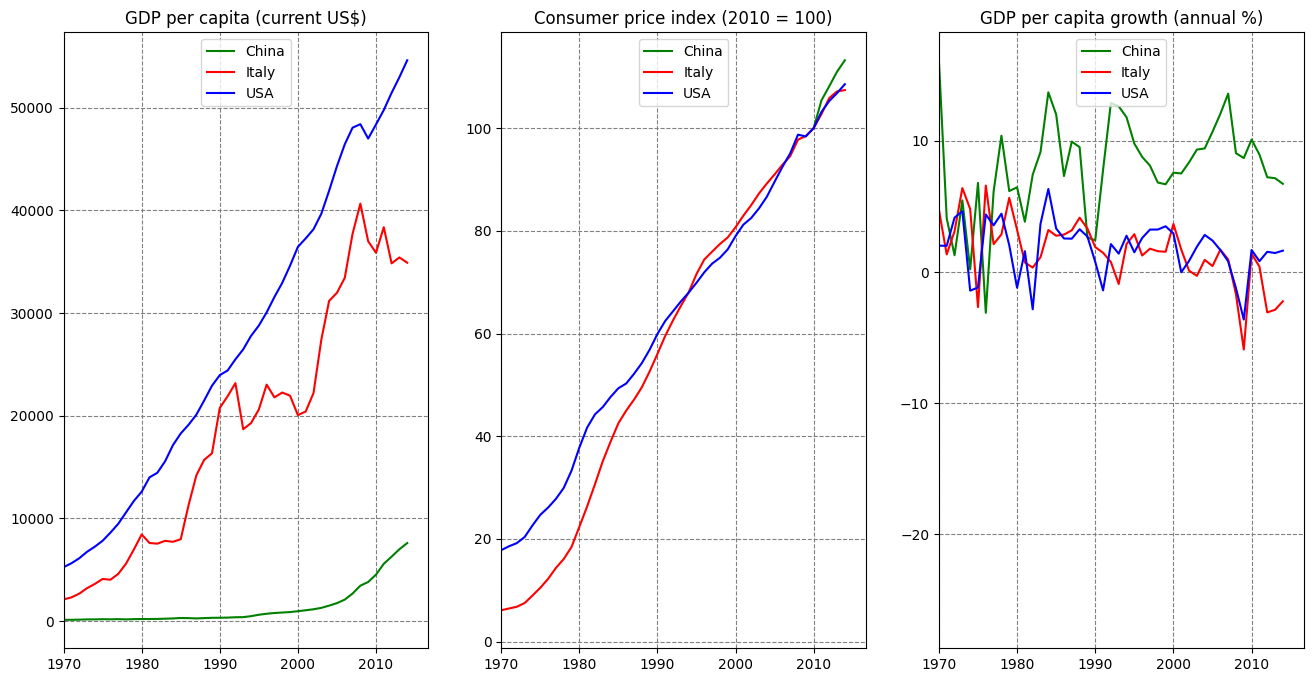

In [ ]:
plot_indicator(indicator_list[16], indicator_list[15], indicator_list[17])

In [ ]:
print('Average GDP per capita growth annual %')
print('China:', china.loc[china['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG', 'Value'].values.astype('float').mean().round(2))
print('Italy:', Italy.loc[Italy['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG', 'Value'].values.astype('float').mean().round(2))
print('USA:', USA.loc[USA['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG', 'Value'].values.astype('float').mean().round(2))

Average GDP per capita growth annual %
China: 6.87
Italy: 2.12
USA: 2.07


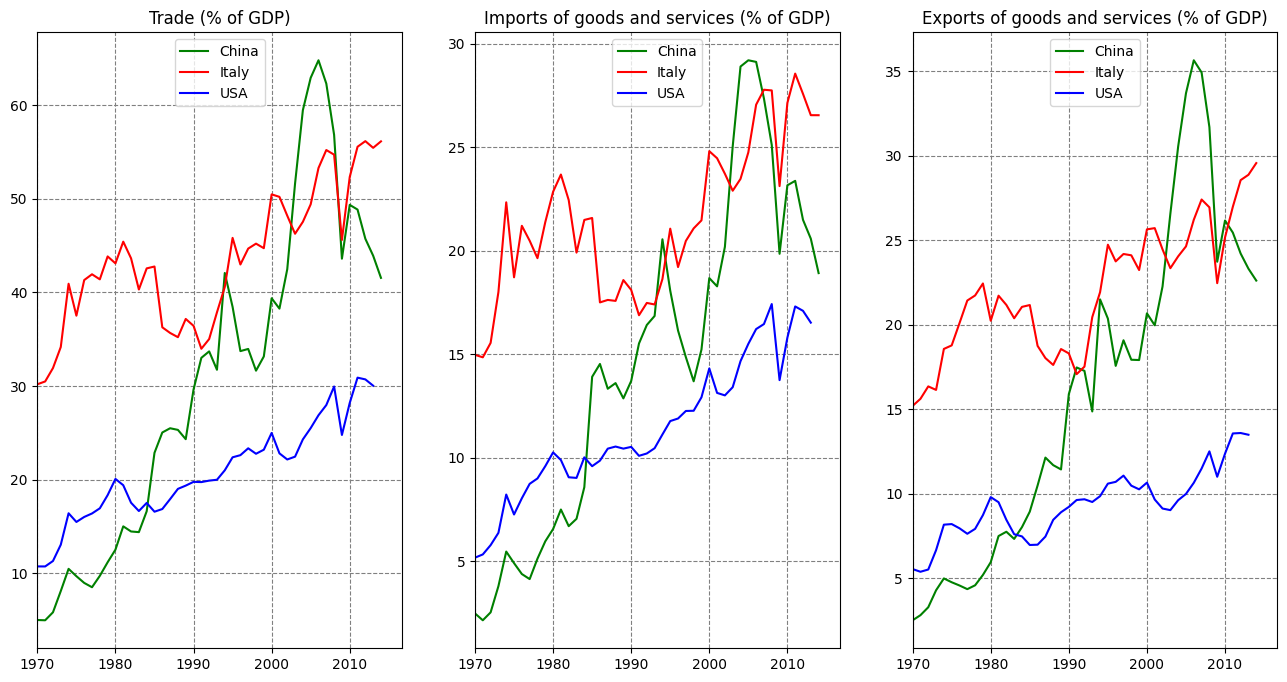

In [ ]:
plot_indicator(indicator_list[14], indicator_list[13], indicator_list[12])

**Life expectancy** has clearly increased in each of the countries being compared since the 1970s. we can see that Italy has a higher life expectancy than other two countries.
Women are assumed to live longer than men.

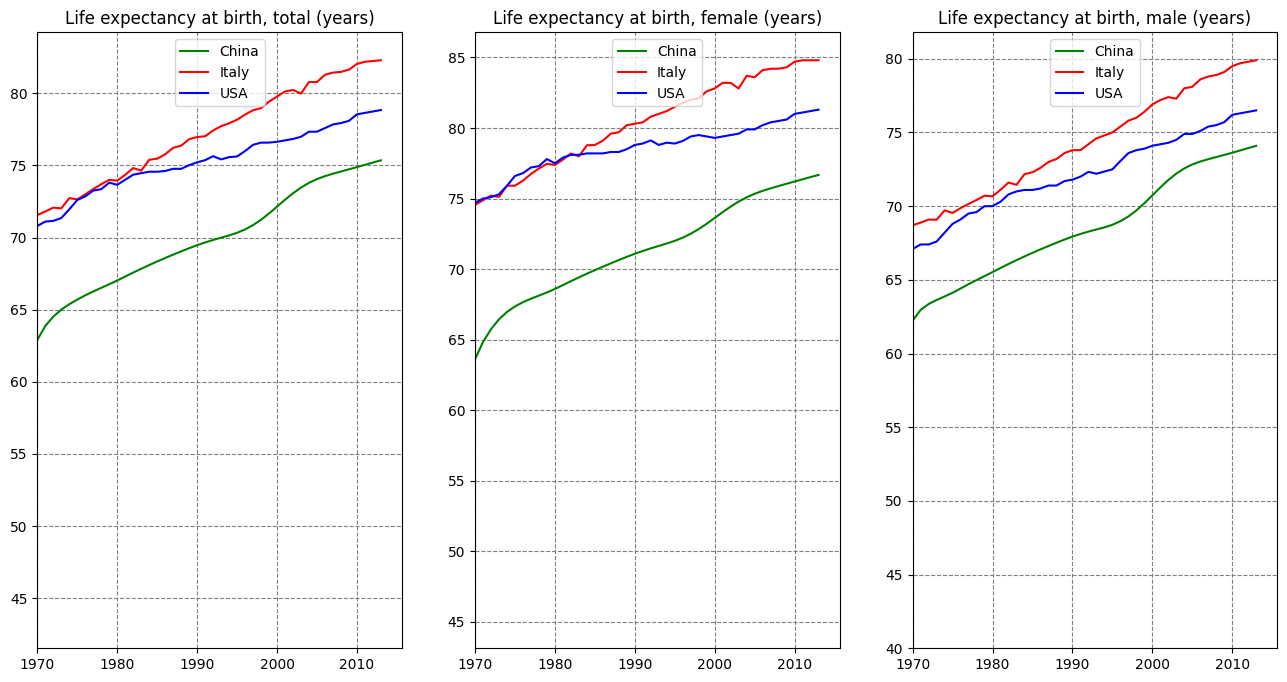

In [ ]:
plot_indicator(indicator_list[8], indicator_list[6], indicator_list[7])

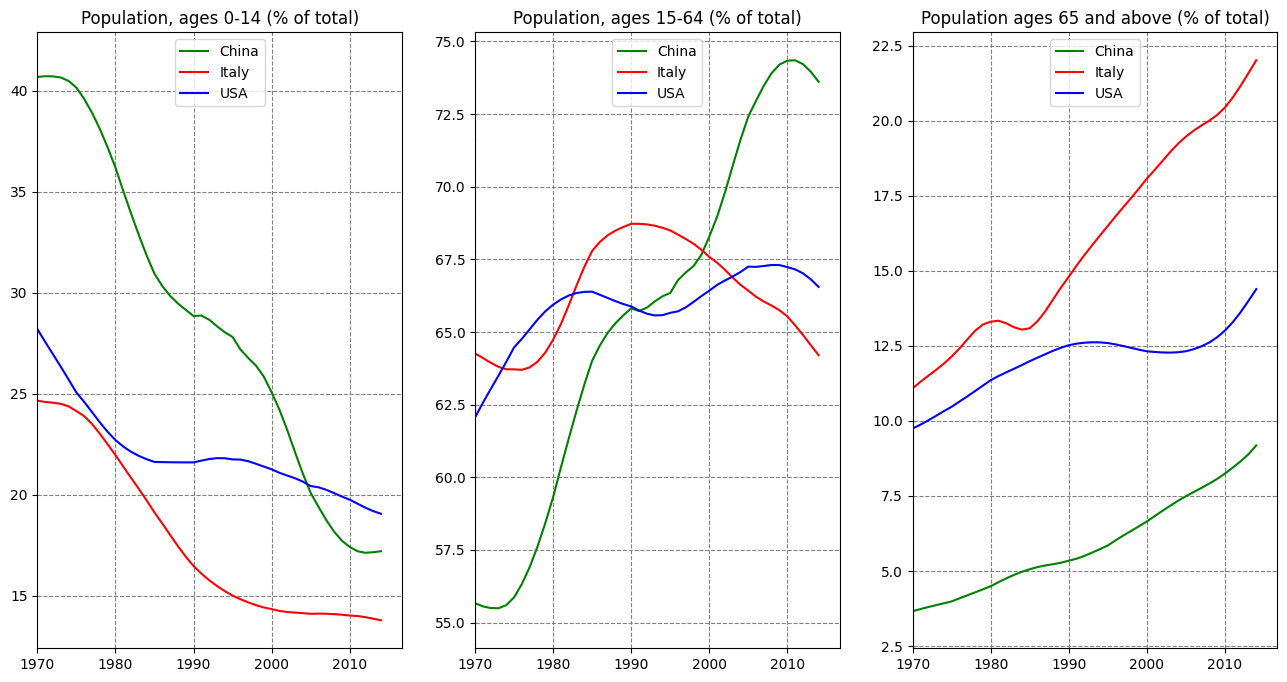

In [ ]:
plot_indicator(indicator_list[4], indicator_list[5], indicator_list[3])

**CO2 emissions and Energy consumption:** China's CO2 emissions have clearly overtaken the US in the 21st century.
Even the slightest increase in per capita energy source consumption in China has a huge impact in CO2 emissions on a global scale. Although USA's  electricity power consumption is higher, it seems to have downward trend in the future, while China has had an upward trend since the beginning.

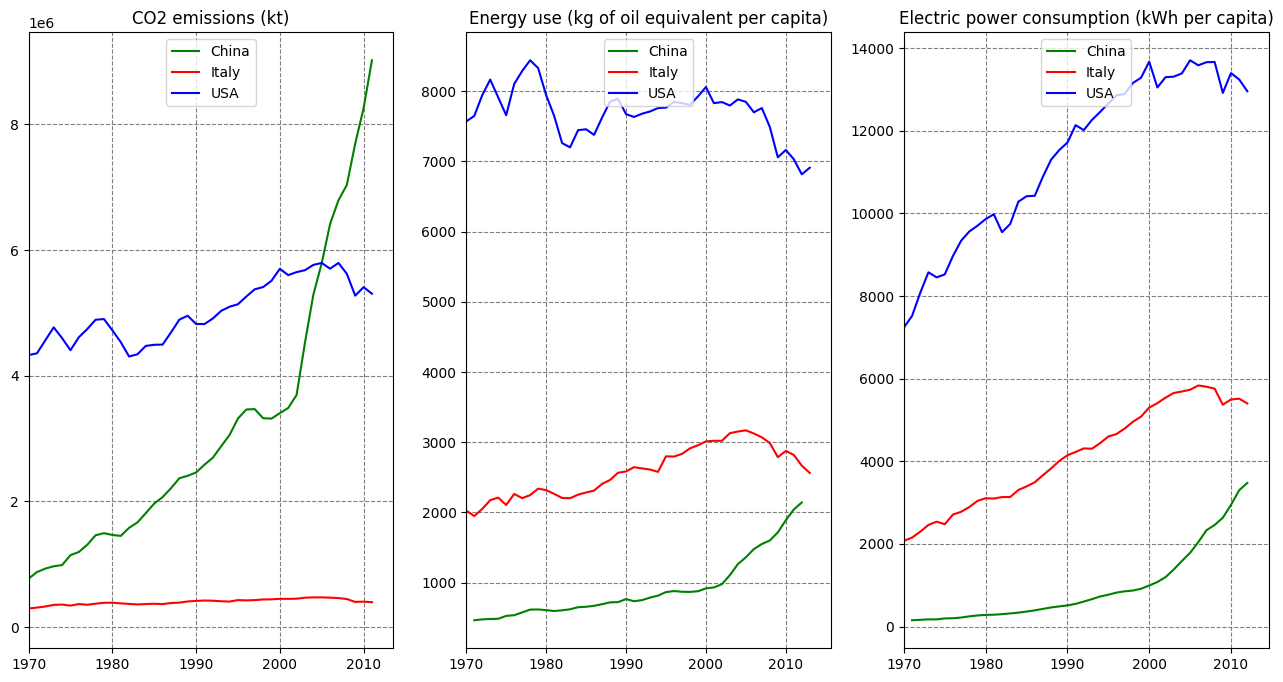

In [ ]:
plot_indicator(indicator_list[9], indicator_list[10], indicator_list[11])

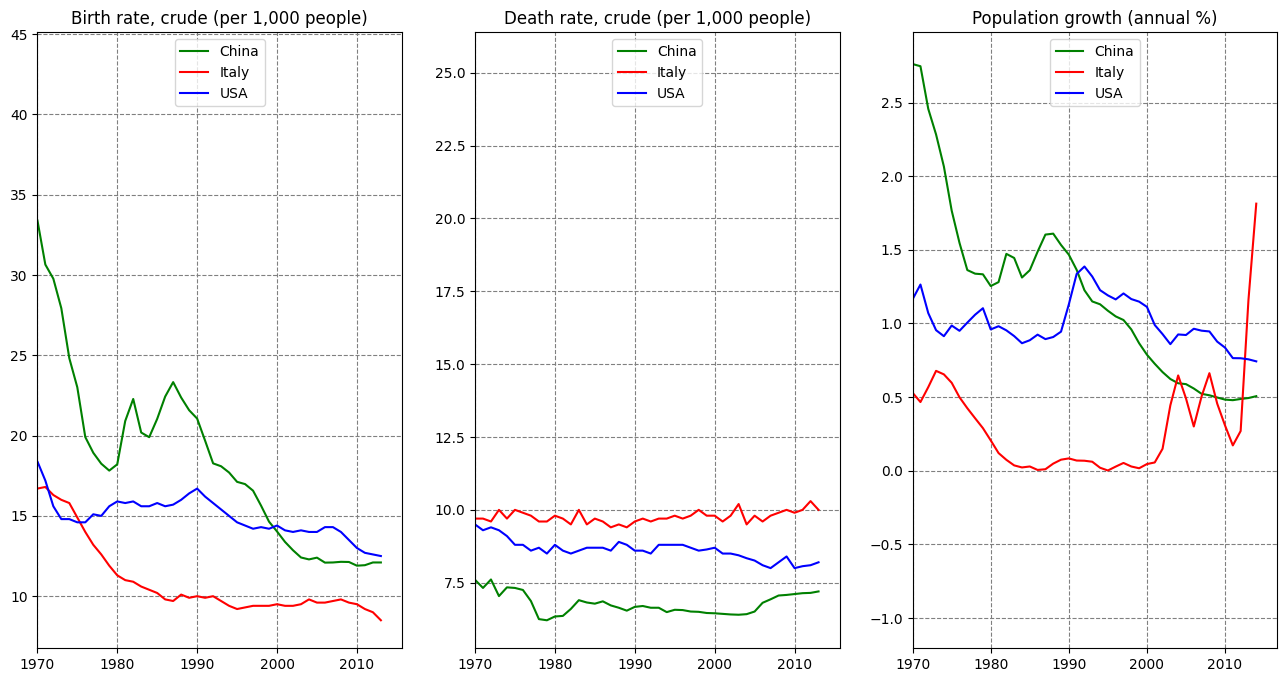

In [ ]:
plot_indicator(indicator_list[0], indicator_list[1], indicator_list[2])

#Correlation

In [ ]:
# Select two indicators, Life expectancy at birth, total (years) and GDP per capita (current US$) to compute the correlation
indicator1 = 'SP.DYN.LE00.IN'  # Life expectancy at birth, total (years)
indicator2 = 'NY.GDP.PCAP.CD'  # GDP per capita (current US$)

# Subset the data to include only the relevant indicators
subset = df.loc[df['IndicatorCode'].isin([indicator1, indicator2])]

# Pivot the data to have indicators as columns and countries as rows
subset = subset.drop_duplicates(['CountryCode', 'IndicatorCode'])
pivoted = subset.pivot(index='CountryCode', columns='IndicatorCode', values='Value')

# Compute the correlation between the two indicators
corr = pivoted.corr().loc[indicator1, indicator2]

print(f"The correlation between {indicator1} and {indicator2} is {corr:.2f}")

The correlation between SP.DYN.LE00.IN and NY.GDP.PCAP.CD is 0.30


In this case, a correlation coefficient of 0.30 suggests a weak positive correlation between life expectancy and GDP per capita, but it's important to keep in mind that correlation does not imply causation.

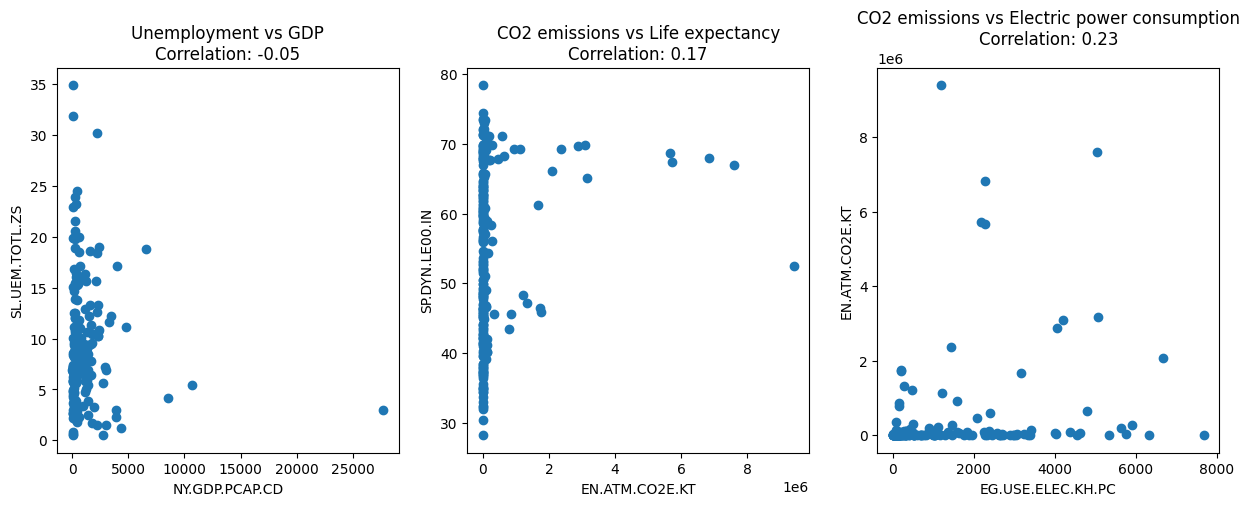

In [ ]:
# Select the indicators we're interested in
indicator1 = 'SL.UEM.TOTL.ZS' # Unemployment, total (% of total labor force)
indicator2 = 'NY.GDP.PCAP.CD' # GDP per capita (current US$)
indicator3 = 'SP.DYN.LE00.IN' # Life expectancy at birth, total (years)
indicator4 = 'EN.ATM.CO2E.KT' # CO2 emissions (kt)
indicator5 = 'EG.USE.ELEC.KH.PC' # Electric power consumption (kWh per capita)

# Subset the data to include only the relevant indicators
subset = df.loc[df['IndicatorCode'].isin([indicator1, indicator2, indicator3, indicator4, indicator5])]

# Drop duplicate entries
subset = subset.drop_duplicates(subset=['CountryName', 'IndicatorCode'])

# Pivot the data to have indicators as columns and countries as rows
pivoted = subset.pivot(index='CountryName', columns='IndicatorCode', values='Value')

# Compute the correlations
corr_unemp_gdp = pivoted.corr().loc[indicator1, indicator2]
corr_co2_life = pivoted.corr().loc[indicator4, indicator3]
corr_co2_elec = pivoted.corr().loc[indicator4, indicator5]

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(pivoted[indicator2], pivoted[indicator1])
axs[0].set_xlabel(indicator2)
axs[0].set_ylabel(indicator1)
axs[0].set_title(f"Unemployment vs GDP\nCorrelation: {corr_unemp_gdp:.2f}")

axs[1].scatter(pivoted[indicator4], pivoted[indicator3])
axs[1].set_xlabel(indicator4)
axs[1].set_ylabel(indicator3)
axs[1].set_title(f"CO2 emissions vs Life expectancy\nCorrelation: {corr_co2_life:.2f}")

axs[2].scatter(pivoted[indicator5], pivoted[indicator4])
axs[2].set_xlabel(indicator5)
axs[2].set_ylabel(indicator4)
axs[2].set_title(f"CO2 emissions vs Electric power consumption\nCorrelation: {corr_co2_elec:.2f}")

plt.show()






 **Heatmap for correlation coefficients between different electricity-related indicators:**It shows the correlation coefficients between different electricity-related indicators for each country. A correlation coefficient is a measure of how two variables are related to each other, and it ranges from -1 to 1. A positive correlation coefficient means that the two variables are positively related (as one increases, so does the other), while a negative correlation coefficient means that the two variables are negatively related (as one increases, the other decreases).

In [ ]:
# function for categorising indicators
def get_category_indicators(df, category):
    category_indicators = []
    for indicator in df['IndicatorName'].unique():
        if category.lower() in indicator.lower():
            category_indicators.append(df[df['IndicatorName']==indicator]['IndicatorCode'].iloc[0])
    return category_indicators

In [ ]:
# Select the category we're interested in
category = 'Electricity'
electricity_indicators = get_category_indicators(df, category)
indicator_names = df.loc[df['IndicatorCode'].isin(electricity_indicators)].drop_duplicates(subset=['IndicatorCode'])['IndicatorName'].tolist()
print(indicator_names)

['CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'Electricity production from renewable sources, excluding hydroelectric (kWh)', 'Electricity production from coal sources (% of total)', 'Electricity production from hydroelectric sources (% of total)', 'Electricity production from natural gas sources (% of total)', 'Electricity production from nuclear sources (% of total)', 'Electricity production from oil sources (% of total)', 'Electricity production from oil, gas and coal sources (% of total)', 'Electricity production from renewable sources, excluding hydroelectric (% of total)', 'Access to electricity (% of population)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Renewable electricity output (% of total electricity output)', 'Time required to get electricity (days)']


In [ ]:
# Subset the data to include only the electricity indicators
electricity_data = pivoted[indicator_names]

# Check for missing values
missing_values = electricity_data.isnull().sum()

# Print the missing values count
print(missing_values)

IndicatorName
CO2 emissions from electricity and heat production, total (% of total fuel combustion)    76
Electricity production from renewable sources, excluding hydroelectric (kWh)              76
Electricity production from coal sources (% of total)                                     79
Electricity production from hydroelectric sources (% of total)                            79
Electricity production from natural gas sources (% of total)                              79
Electricity production from nuclear sources (% of total)                                  79
Electricity production from oil sources (% of total)                                      79
Electricity production from oil, gas and coal sources (% of total)                        79
Electricity production from renewable sources, excluding hydroelectric (% of total)       79
Access to electricity (% of population)                                                    0
Access to electricity, rural (% of rural population)    

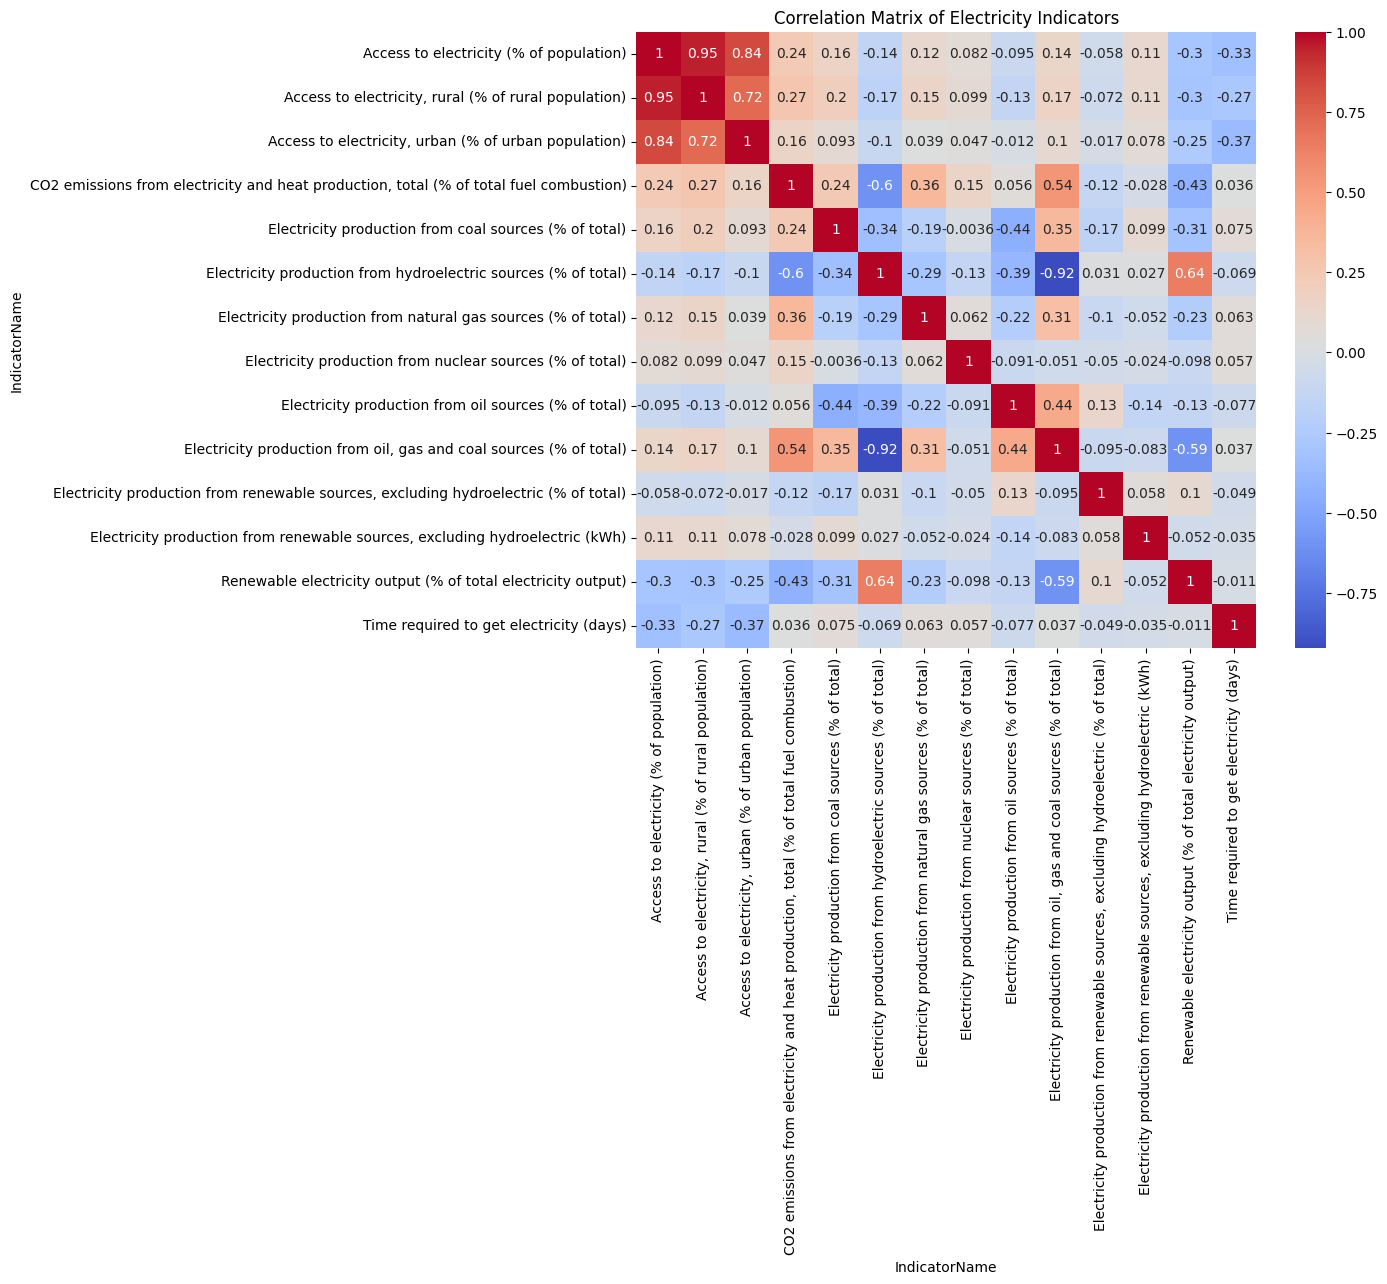

In [ ]:
# Create a dictionary to map indicator codes to names
indicator_dict = dict(df.loc[df['IndicatorCode'].isin(electricity_indicators)].drop_duplicates(subset=['IndicatorCode']).set_index('IndicatorCode')['IndicatorName'])

# Subset the data to include only the relevant indicators
subset = df.loc[df['IndicatorCode'].isin(electricity_indicators)].drop_duplicates(subset=['CountryName', 'IndicatorCode'])
subset.loc[:, 'IndicatorName'] = subset['IndicatorCode'].map(indicator_dict)

# Pivot the data to have indicators as columns and countries as rows
pivoted = subset.pivot(index='CountryName', columns='IndicatorName', values='Value')

# Replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
electricity_data = pd.DataFrame(imputer.fit_transform(pivoted), index=pivoted.index, columns=pivoted.columns)

# Compute the correlations
corr_matrix = electricity_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title(f'Correlation Matrix of {category} Indicators')
plt.show()


Looking at the heatmap, we can see that some indicators have a strong positive correlation, such as "Access to electricity, rural (% of rural population)" and "Access to electricity, urban (% of urban population)". This makes sense, as countries that have good access to electricity in urban areas are likely to have good access in rural areas as well.

On the other hand, some indicators have a negative correlation, such as "Electricity production from hydroelectric sources (% of total)" and "Electricity production from oil, gas and coal sources (% of total)". This suggests that countries that invest more in renewable sources of energy tend to invest less in clean sources and vice versa.

#PCA

**Principal Component Analysis (PCA)** is a commonly used technique for dimensionality reduction in data analysis. It works by transforming the data from a high-dimensional space into a lower-dimensional space while retaining as much of the original information as possible.

PCA can be particularly useful when dealing with a large number of variables, as it can help to identify patterns and correlations between them.

**In the context of the electricity indicators correlation matrix, PCA could help to identify groups of indicators that are highly correlated with each other and may therefore be measuring similar aspects of electricity usage and access.**

To perform PCA on the correlation matrix, we would first need to standardize the data to ensure that all variables have a mean of zero and a standard deviation of one. Then we can calculate the principal components and explore how much variance each component explains. We can also look at the loadings of each variable on each component to see which variables are most strongly associated with each component.

Once we have identified the principal components, we can use them to create a new set of variables that capture the most important information in the original data. These new variables can be used in further analyses, such as clustering or regression, to explore the relationships between electricity indicators and other variables of interest.

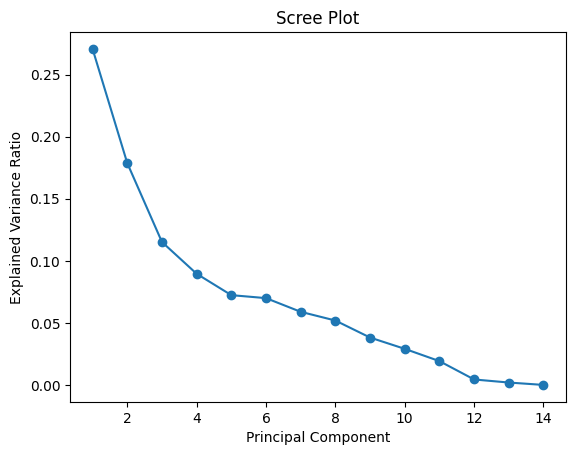

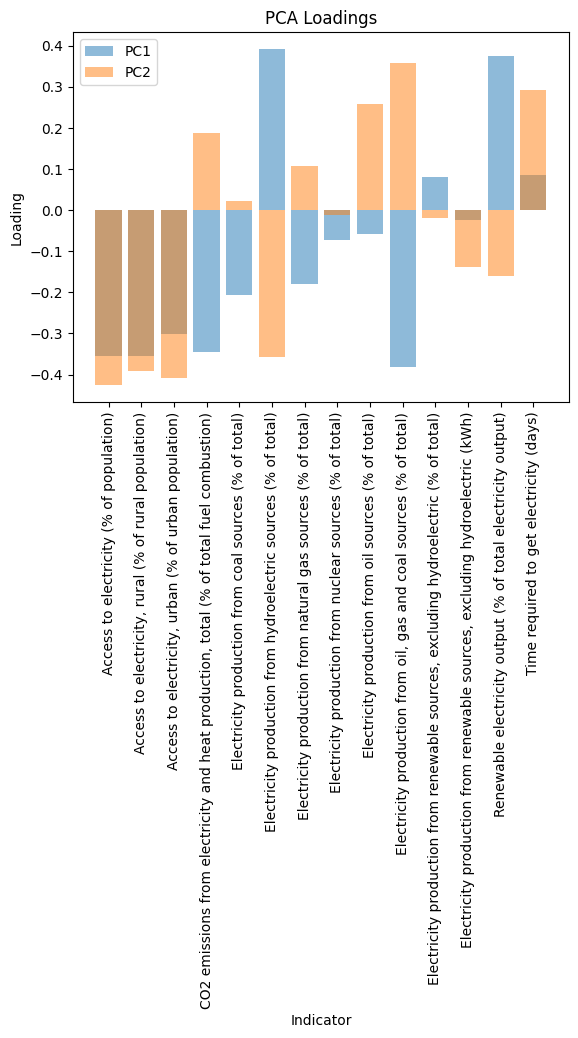

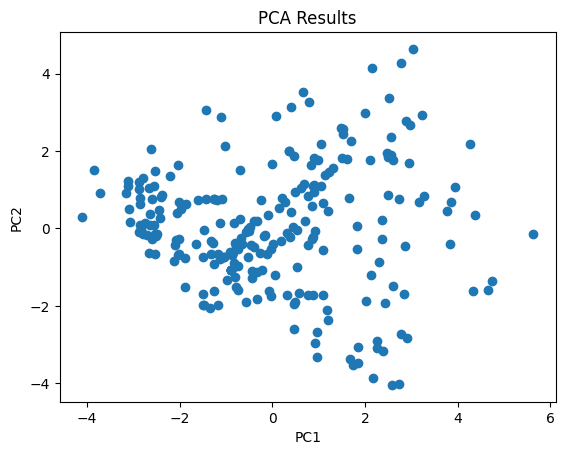

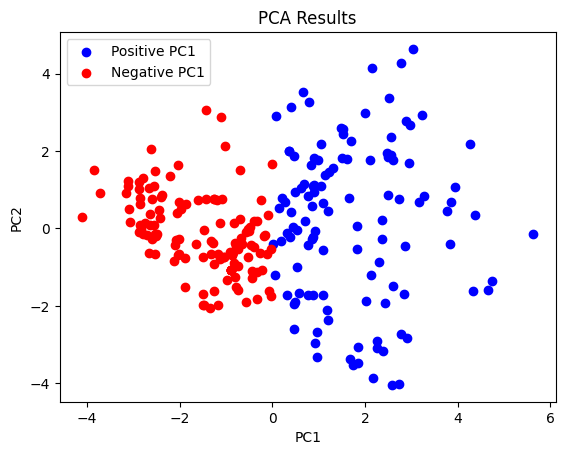

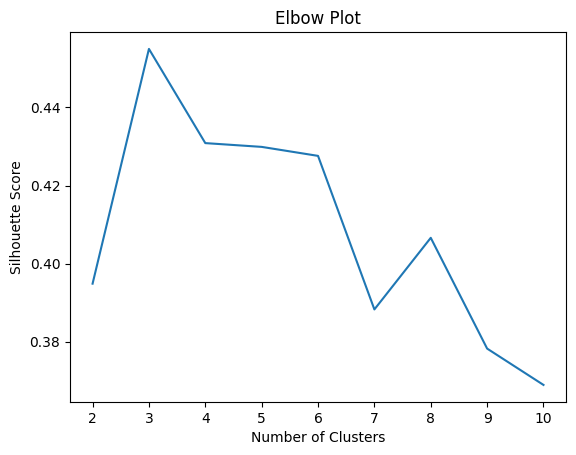

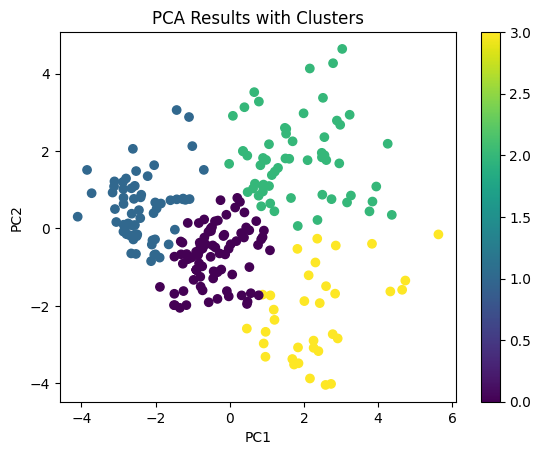

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivoted_imputed)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratios
explained_variances = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(len(explained_variances))+1, explained_variances, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Get the loadings for the first two principal components
loadings = pca.components_[:2].T

# Plot the loadings
plt.bar(np.arange(loadings.shape[0]), loadings[:, 0], alpha=0.5, label='PC1')
plt.bar(np.arange(loadings.shape[0]), loadings[:, 1], alpha=0.5, label='PC2')
plt.xticks(np.arange(loadings.shape[0]), pivoted.columns, rotation=90)
plt.xlabel('Indicator')
plt.ylabel('Loading')
plt.title('PCA Loadings')
plt.legend()
plt.show()

# Transform the data to the first two principal components
pca_data = pca.transform(scaled_data)[:, :2]

# Plot the transformed data
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()

import matplotlib.pyplot as plt
# Assume that `pca_data` contains your transformed data
pc1 = pca_data[:, 0]
pc2 = pca_data[:, 1]

# Create a boolean mask to split the data points by their sign on PC1
positive_mask = pc1 >= 0
negative_mask = pc1 < 0

# Plot the positive PC1 points in blue and negative PC1 points in red
plt.scatter(pc1[positive_mask], pc2[positive_mask], c='b', label='Positive PC1')
plt.scatter(pc1[negative_mask], pc2[negative_mask], c='r', label='Negative PC1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.legend()
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Create a list of silhouette scores for different k values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plot the elbow plot
plt.plot(range(2, 11), silhouette_scores)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Perform KMeans clustering on the transformed data
kmeans = KMeans(n_clusters=4, random_state=42, n_init=30)
clusters = kmeans.fit_predict(pca_data)

# Plot the scatter plot with different colors for each cluster
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results with Clusters')
plt.colorbar()
plt.show()

Plots the transformed data onto a two-dimensional space using the first two principal components. output:

**The scatter plot** of the transformed data shows clusters of countries. This indicates that there are underlying patterns and similarities in the development indicators of these countries.

**scatter plot result**, transformed data in a scatter plot and differentiates the data points based on their sign on the first principal component (PC1). The positive PC1 points are plotted in blue, while the negative PC1 points are plotted in red. This is achieved by creating boolean masks for the positive and negative PC1 points and plotting them separately with different colors. The resulting plot shows the separation of data points based on their sign on PC1.

**The scree plot** shows that the first two principal components explain the majority of the variance in the data. This means that the first two principal components are the most important ones to consider when analyzing the data.

**The loadings plot** shows the weights of the original indicators on the first two principal components. We can see that some indicators have higher weights on one component than the other, indicating that they have a stronger influence on certain patterns in the data.

The results of PCA suggest that there are commonalities among the development indicators of different countries, and these commonalities can be captured by reducing the dimensionality of the data using PCA.

#EFA

**Exploratory factor analysis**
We use EFA to reduce the dimensionality of the data by identifying a smaller number of factors that explain the patterns and relationships among the observed variables. These factors are typically unobservable and represent underlying constructs or concepts. By identifying these factors, EFA can provide insights into the underlying structure and relationships within the data.

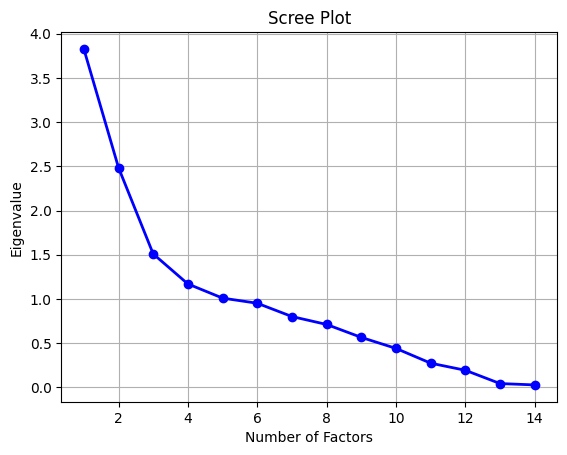

In [ ]:
# Perform factor analysis
fa = FactorAnalyzer(n_factors=10, rotation=None)
fa.fit(pivoted)

# Get the eigenvalues
eigenvalues = fa.get_eigenvalues()[0]

# Plot the scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

**Heatmap of EFA Factor Loadings:**

The heatmap of the factor loadings displays the strength and direction of the relationships between the extracted factors and the electricity indicators. Factor loadings represent the correlation coefficients between each indicator and the underlying factors.

**analysis of Heatmap:**

Darker shades of red indicate stronger positive correlations between the factor and the indicator, suggesting that the factor has a higher influence on the indicator.
Darker shades of blue indicate stronger negative correlations between the factor and the indicator, suggesting an inverse relationship between the factor and the indicator.
Values close to 0 or lighter shades indicate weaker or negligible correlations.
By examining the heatmap, you can identify patterns and associations between the factors and the electricity indicators. Clusters of indicators with similar loadings on a particular factor may suggest underlying themes or latent constructs. The heatmap provides insights into how different factors contribute to the variability of the indicators, helping in the interpretation of the underlying factors.



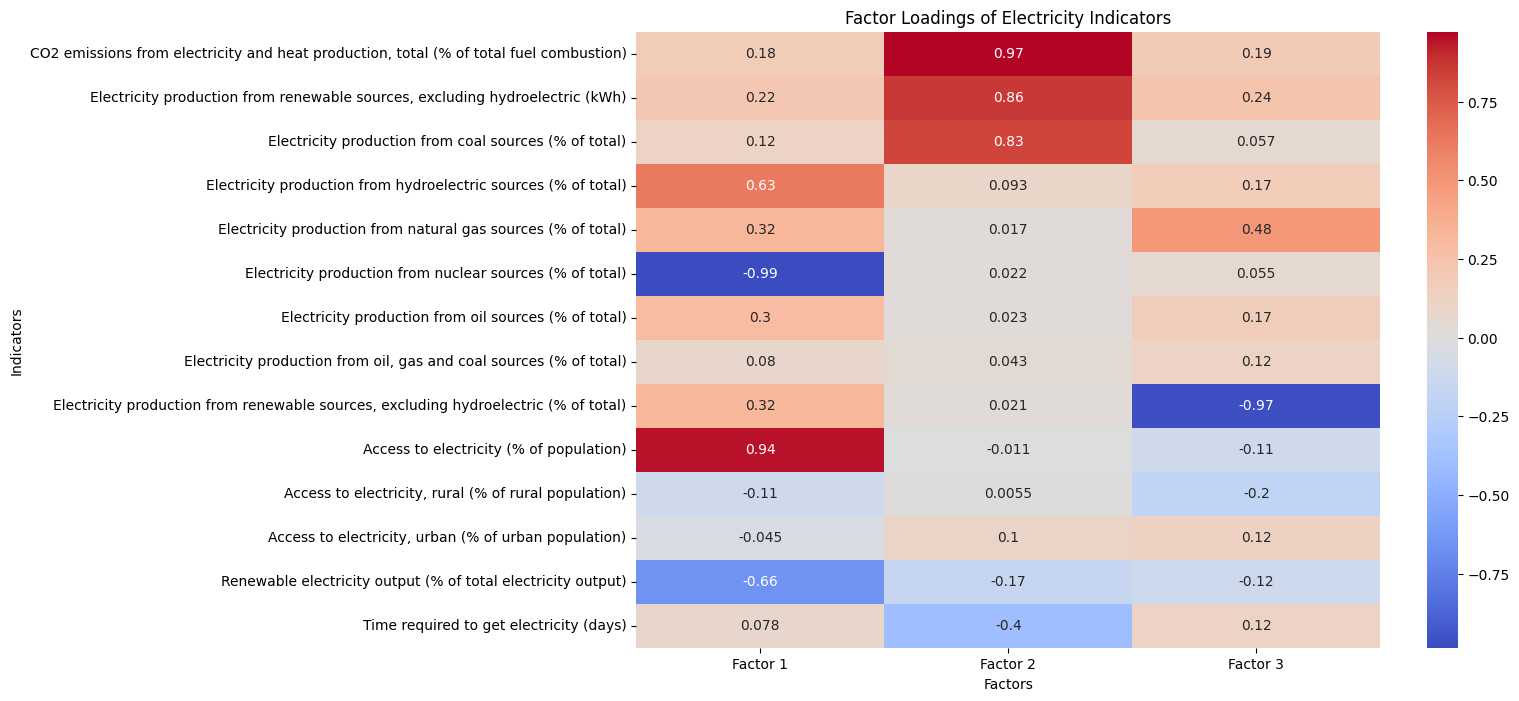

In [ ]:
from factor_analyzer import FactorAnalyzer

# Perform factor analysis (EFA)
efa = FactorAnalyzer(n_factors=3, rotation='varimax')
efa.fit(pivoted_imputed)

# Get the factor loadings
factor_loadings = efa.loadings_

# Plot the factor loadings using a heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(factor_loadings, cmap='coolwarm', annot=True, xticklabels=['Factor 1', 'Factor 2', 'Factor 3'], yticklabels=electricity_data.columns)
plt.title('Factor Loadings of Electricity Indicators')
plt.xlabel('Factors')
plt.ylabel('Indicators')
plt.show()


**Communalities of Electricity Indicators:**

The communalities represent the proportion of variance in each indicator that is explained by the underlying factors extracted through the EFA. In other words, communalities indicate how much of the total variance in an indicator can be attributed to the common factors.

**Interpretation of the plot:**

Higher communalities (closer to 1) indicate that a larger proportion of the indicator's variance is explained by the underlying factors.
Lower communalities (closer to 0) suggest that the specific indicator may have unique or idiosyncratic variance not captured by the extracted factors.
By examining the communalities, you can assess the overall adequacy of the EFA model in explaining the variance in the electricity indicators. Higher communalities indicate a better fit of the model to the data, suggesting that the factors extracted are effective in capturing the shared variance among the indicators.

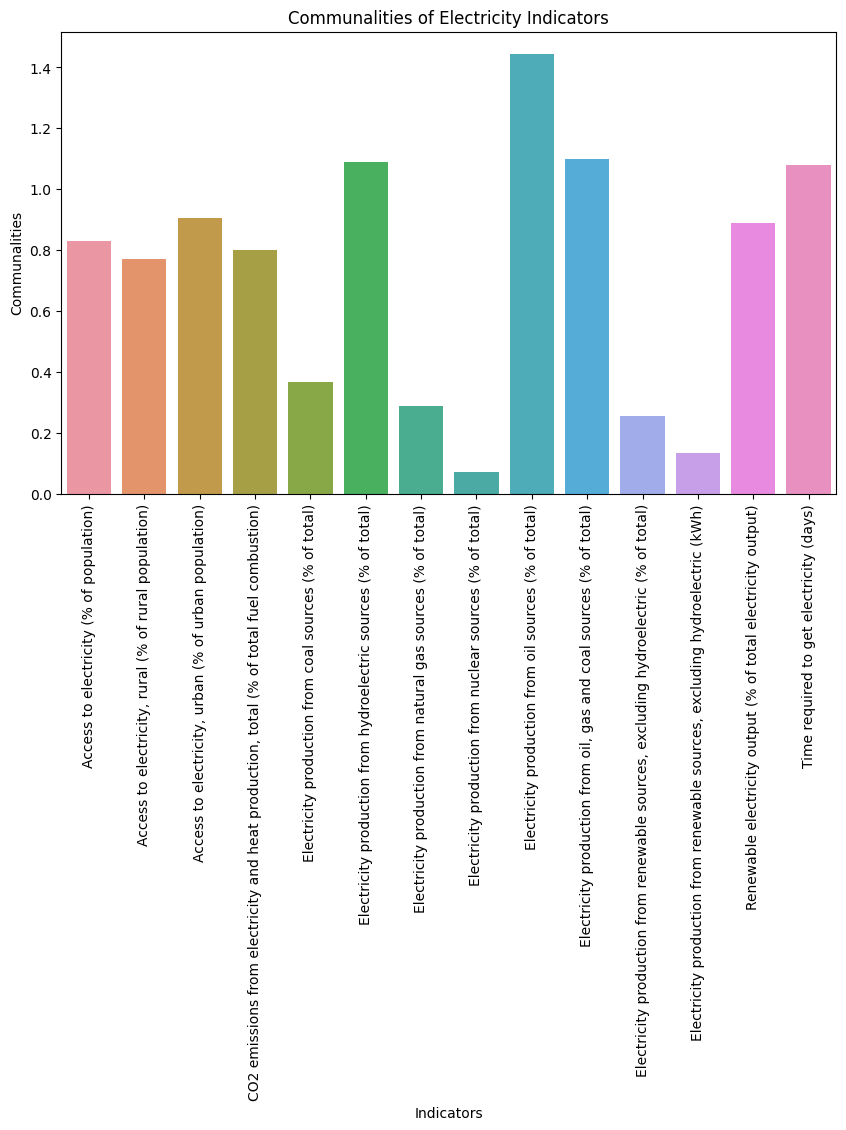

In [ ]:
from factor_analyzer import FactorAnalyzer

# Compute the correlations
corr_matrix = pivoted.corr()

# Perform factor analysis
factor_analyzer = FactorAnalyzer()
factor_analyzer.fit(corr_matrix)

# Get the communalities
communalities = factor_analyzer.get_communalities()

# Plot the communalities
plt.figure(figsize=(10, 6))
sb.barplot(x=list(pivoted.columns), y=communalities)
plt.title('Communalities of Electricity Indicators')
plt.xlabel('Indicators')
plt.ylabel('Communalities')
plt.xticks(rotation=90)
plt.show()